# Q2
Pseudocode:
1. Define functions for $a_x$ and $a_y$ as found in Q2 part a).
2. Instantiate variables N = 1000 steps and h = 0.001 step size, as well as v_yi = 0.0 and v_xi = 0.0 initial velocity.
3. Definine initial conditions r_yi and r_xi for position.
4. Preallocate memory to an empty arrays r_x and r_y of length N to later store displacement values for x and y.
4. In a for-loop in range of N update trajectory values according to the series of equations 8-11 in the lab manual (Verlet method) and store the values for ith


In [61]:
import numpy as np

def doVerlet(r1_xi, r1_yi, r2_xi, r2_yi):

    def a1_x(x1, x2, y1, y2):
        r = np.sqrt((x2- x1)**2 + (y2 - y1)**2)
        return (24 * (x2 - x1) * ((r**2)**(-4))) * (2 * ((r**2)**(-3)) - 1)
    def a1_y(x1, x2, y1, y2):
        r = np.sqrt((x2- x1)**2 + (y2 - y1)**2)
        return (24 * (y2 - y1) * ((r**2)**(-4))) * (2 * ((r**2)**(-3)) - 1)
    def a2_x(x1, x2, y1, y2):
        r = np.sqrt((x2- x1)**2 + (y2 - y1)**2)
        return - (24 * (x2 - x1) * ((r**2)**(-4))) * (2 * ((r**2)**(-3)) - 1)
    def a2_y(x1, x2, y1, y2):
        r = np.sqrt((x2- x1)**2 + (y2 - y1)**2)
        return - (24 * (y2 - y1) * ((r**2)**(-4))) * (2 * ((r**2)**(-3)) - 1)

    N = 1000
    h = 0.001

    v1_xi = 0.0
    v1_yi = 0.0
    v2_xi = 0.0
    v2_yi = 0.0

    r1_x = np.empty(N)
    r1_y = np.empty(N)
    v1_x = np.empty(N)
    v1_y = np.empty(N)
    r2_x = np.empty(N)
    r2_y = np.empty(N)
    v2_x = np.empty(N)
    v2_y = np.empty(N)
    
    v1_x[0] = v1_xi
    v1_y[0] = v1_yi
    v2_x[0] = v1_xi
    v2_y[0] = v1_yi
    r1_x[0] = r1_xi
    r1_y[0] = r1_yi
    r2_x[0] = r1_xi
    r2_y[0] = r1_yi

    #eq 7
    #variables with _prep suffix get updated at each iteration and represent
    #v(t+h/2) in Verlet algorithm (eq 8 - 11) in lab manual
    v1_x_prep = v1_x[0] + 0.5 * h * a1_x(r1_xi, r2_xi,r2_xi, r2_yi)
    v1_y_prep = v1_y[0] + 0.5 * h * a1_y(r1_xi, r2_xi,r2_xi, r2_yi)
    v2_x_prep = v2_x[0] + 0.5 * h * a2_x(r1_xi, r2_xi,r2_xi, r2_yi)
    v2_y_prep = v2_y[0] + 0.5 * h * a2_y(r1_xi, r2_xi,r2_xi, r2_yi)
    #eq 8
    r1_x[1] = r1_x[0] + h * v1_x_prep
    r1_y[1] = r1_y[0] + h * v1_y_prep
    r2_x[1] = r2_x[0] + h * v1_x_prep
    r2_y[1] = r2_y[0] + h * v2_y_prep
    #eq 10
    v1_x[1] = v1_x_prep + 0.5 * h * a1_x(r1_x[1], r1_y[1], r2_x[1], r2_y[1])
    v1_x[1] = v1_y_prep + 0.5 * h * a1_x(r1_x[1], r1_y[1], r2_x[1], r2_y[1])
    v2_x[1] = v2_x_prep + 0.5 * h * a2_x(r1_x[1], r1_y[1], r2_x[1], r2_y[1])                   
    v2_y[1] = v2_y_prep + 0.5 * h * a2_y(r1_x[1], r1_y[1], r2_x[1], r2_y[1])
    #eq 9 and 11 combined
    v1_x_prep = v1_x_prep + h * a1_x(r1_x[1], r1_y[1], r2_x[1], r2_y[1])
    v1_y_prep = v1_y_prep + h * a1_y(r1_x[1], r1_y[1], r2_x[1], r2_y[1])
    v2_x_prep = v2_x_prep + h * a2_x(r1_x[1], r1_y[1], r2_x[1], r2_y[1])
    v2_y_prep = v2_y_prep + h * a2_y(r1_x[1], r1_y[1], r2_x[1], r2_y[1])

    for i in range(2,N):
        #eq 8                                  
        r1_x[i] = r1_x[i-1] + h * v1_x_prep
        r1_y[i] = r1_y[i-1] + h * v1_y_prep
        r2_x[i] = r2_x[i-1] + h * v2_x_prep
        r2_y[i] = r2_y[i-1] + h * v2_y_prep
        #eq 10
        v1_x[i] = v1_x_prep + 0.5 * h * a1_x(r1_x[i], r1_y[i], r2_x[i], r2_y[i])
        v1_x[i] = v1_y_prep + 0.5 * h * a1_x(r1_x[i], r1_y[i], r2_x[i], r2_y[i])
        v2_x[i] = v2_x_prep + 0.5 * h * a2_x(r1_x[i], r1_y[i], r2_x[i], r2_y[i])                 
        v2_y[i] = v2_y_prep + 0.5 * h * a2_y(r1_x[i], r1_y[i], r2_x[i], r2_y[i])
        #eq 9 and 11 combined
        v1_x_prep = v1_x_prep + h * a1_x(r1_x[i], r1_y[i], r2_x[i], r2_y[i])
        v1_y_prep = v1_y_prep + h * a1_y(r1_x[i], r1_y[i], r2_x[i], r2_y[i])
        v2_x_prep = v2_x_prep + h * a2_x(r1_x[i], r1_y[i], r2_x[i], r2_y[i])
        v2_x_prep = v2_x_prep + h * a2_y(r1_x[i], r1_y[i], r2_x[i], r2_y[i])
    t = np.linspace(0,h*(N-1),N)
    return v1_x, v1_y, v2_x, v2_y, r1_x, r1_y, r2_x, r2_y, t

In [62]:
#different initial conditions
#i)
r1_xi_a = 4
r1_yi_a = 4
r2_xi_a = 5.2
r2_yi_a = 4
v1_x_a, v1_y_a, v2_x_a, v2_y_a, r1_x_a, r1_y_a, r2_x_a, r2_y_a,t = doVerlet(r1_xi_a, r1_yi_a, r2_xi_a, r2_yi_a)
#ii)
r1_xi_b = 4.5
r1_yi_b = 4
r2_xi_b = 5.2
r2_yi_b = 4
v1_x_b, v1_y_b, v2_x_b, v2_y_b, r1_x_b, r1_y_b, r2_x_b, r2_y_b,t = doVerlet(r1_xi_b, r1_yi_b, r2_xi_b, r2_yi_b)
#iii)
r1_xi_c = 2
r1_yi_c = 3
r2_xi_c = 3.5
r2_yi_c = 4.4
v1_x_c, v1_y_c, v2_x_c, v2_y_c, r1_x_c, r1_y_c, r2_x_c, r2_y_c,t = doVerlet(r1_xi_c, r1_yi_c, r2_xi_c, r2_yi_c)

(1.4984219602265823, 2.924131764148396, 2.5268767406937354, 3.0238258097901873)

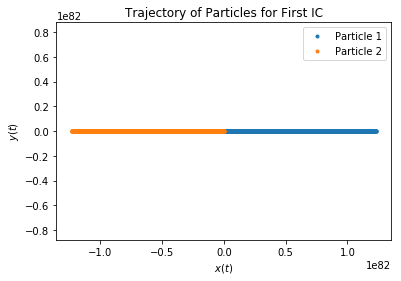

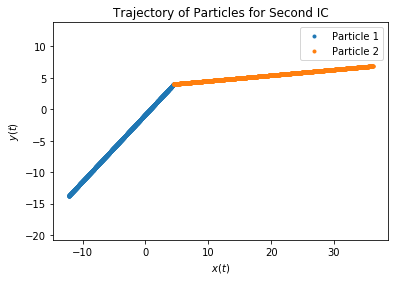

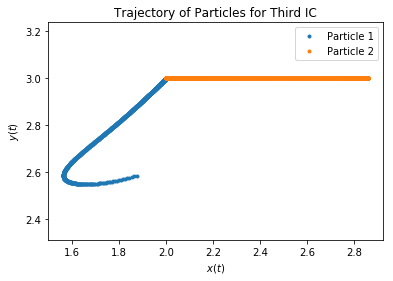

In [63]:
#plot trajectories
import matplotlib.pyplot as plt
#i)
plt.figure()
plt.title('Trajectory of Particles for First IC')
plt.xlabel('$x(t)$')
plt.ylabel('$y(t)$')
plt.plot(r1_x_a, r1_y_a, '.', label = 'Particle 1')
plt.plot(r2_x_a, r2_y_a, '.', label = 'Particle 2')
plt.legend()
plt.axis('equal')
#ii)
plt.figure()
plt.title('Trajectory of Particles for Second IC')
plt.xlabel('$x(t)$')
plt.ylabel('$y(t)$')
plt.plot(r1_x_b, r1_y_b, '.', label = 'Particle 1')
plt.plot(r2_x_b, r2_y_b, '.', label = 'Particle 2')
plt.legend()
plt.axis('equal')
#iii)
plt.figure()
plt.title('Trajectory of Particles for Third IC')
plt.xlabel('$x(t)$')
plt.ylabel('$y(t)$')
plt.plot(r1_x_c, r1_y_c, '.', label = 'Particle 1')
plt.plot(r2_x_c, r2_y_c, '.', label = 'Particle 2')
plt.legend()
plt.axis('equal')

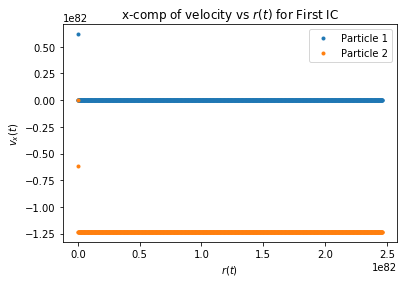

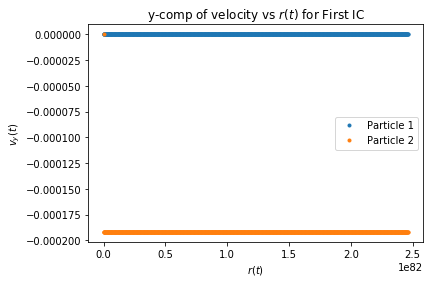

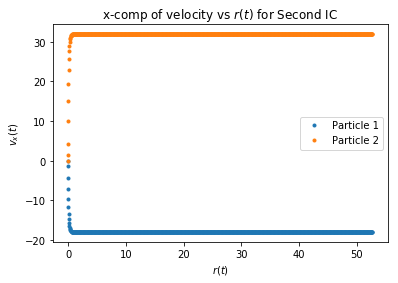

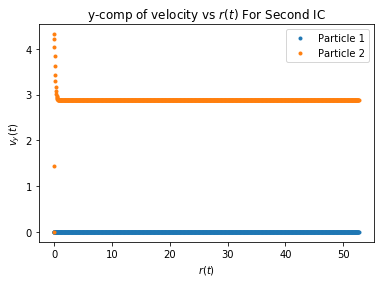

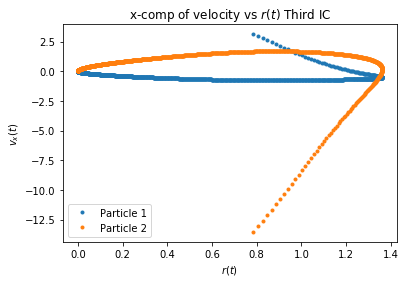

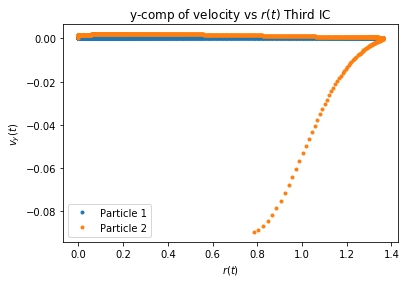

In [64]:
#check behaviour
#a good way to do that is see how the 
#velocities change with distance between the particles
#particularly paying attention to parity

#get distnaces 
def distance(x1,x2,y1,y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

r_a = distance(r1_x_a, r2_x_a, r1_y_a, r2_y_a)
r_b = distance(r1_x_b, r2_x_b, r1_y_b, r2_y_b)
r_c = distance(r1_x_c, r2_x_c, r1_y_c, r2_y_c)

#plot
plt.figure()
plt.title('x-comp of velocity vs $r(t)$ for First IC')
plt.xlabel('$r(t)$')
plt.ylabel('$v_x(t)$')
plt.plot(r_a, v1_x_a, '.', label = 'Particle 1')
plt.plot(r_a, v2_x_a, '.', label = 'Particle 2')
plt.legend()
plt.figure()
plt.title('y-comp of velocity vs $r(t)$ for First IC')
plt.xlabel('$r(t)$')
plt.ylabel('$v_y(t)$')
plt.plot(r_a, v1_y_a, '.', label = 'Particle 1')
plt.plot(r_a, v2_y_a, '.', label = 'Particle 2')
plt.legend()

plt.figure()
plt.title('x-comp of velocity vs $r(t)$ for Second IC')
plt.xlabel('$r(t)$')
plt.ylabel('$v_x(t)$')
plt.plot(r_b, v1_x_b, '.', label = 'Particle 1')
plt.plot(r_b, v2_x_b, '.', label = 'Particle 2')
plt.legend()
plt.figure()
plt.title('y-comp of velocity vs $r(t)$ For Second IC')
plt.xlabel('$r(t)$')
plt.ylabel('$v_y(t)$')
plt.plot(r_b, v1_y_b, '.', label = 'Particle 1')
plt.plot(r_b, v2_y_b, '.', label = 'Particle 2')
plt.legend()

plt.figure()
plt.title('x-comp of velocity vs $r(t)$ Third IC')
plt.xlabel('$r(t)$')
plt.ylabel('$v_x(t)$')
plt.plot(r_c, v1_x_c, '.', label = 'Particle 1')
plt.plot(r_c, v2_x_c, '.', label = 'Particle 2')
plt.legend()
plt.figure()
plt.title('y-comp of velocity vs $r(t)$ Third IC')
plt.xlabel('$r(t)$')
plt.ylabel('$v_y(t)$')
plt.plot(r_c, v1_y_c, '.', label = 'Particle 1')
plt.plot(r_c, v2_y_c, '.', label = 'Particle 2')
plt.legend()

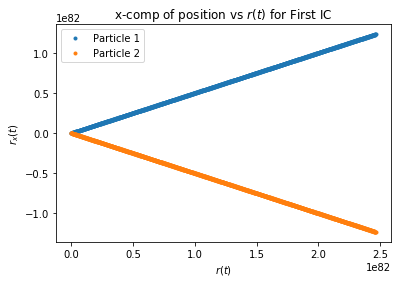

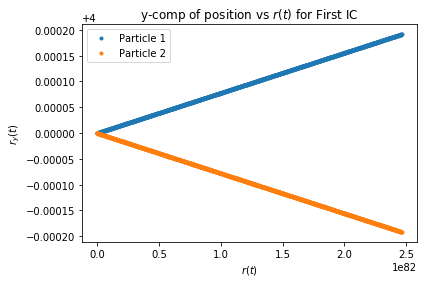

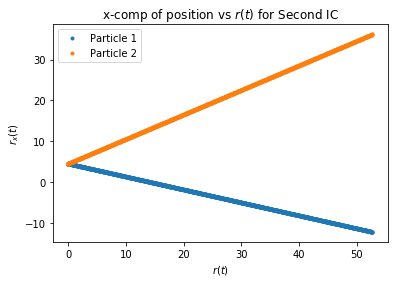

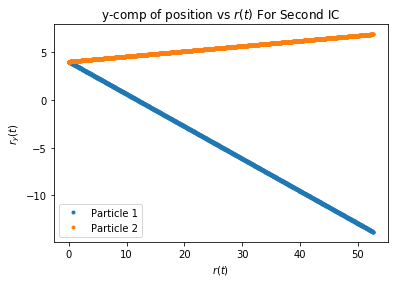

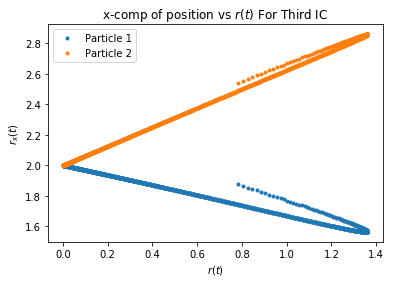

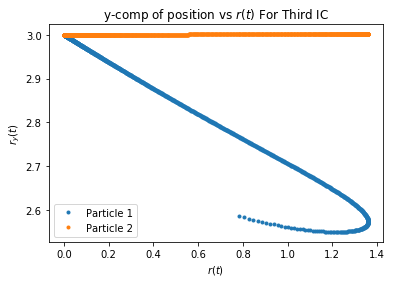

In [65]:
#make sure velocity plots make sense
#with position plots by looking at slope in position
#vs r

#plot
plt.figure()
plt.title('x-comp of position vs $r(t)$ for First IC')
plt.xlabel('$r(t)$')
plt.ylabel('$r_x(t)$')
plt.plot(r_a, r1_x_a, '.', label = 'Particle 1')
plt.plot(r_a, r2_x_a, '.', label = 'Particle 2')
plt.legend()
plt.figure()
plt.title('y-comp of position vs $r(t)$ for First IC')
plt.xlabel('$r(t)$')
plt.ylabel('$r_y(t)$')
plt.plot(r_a, r1_y_a, '.', label = 'Particle 1')
plt.plot(r_a, r2_y_a, '.', label = 'Particle 2')
plt.legend()

plt.figure()
plt.title('x-comp of position vs $r(t)$ for Second IC')
plt.xlabel('$r(t)$')
plt.ylabel('$r_x(t)$')
plt.plot(r_b, r1_x_b, '.', label = 'Particle 1')
plt.plot(r_b, r2_x_b, '.', label = 'Particle 2')
plt.legend()
plt.figure()
plt.title('y-comp of position vs $r(t)$ For Second IC')
plt.xlabel('$r(t)$')
plt.ylabel('$r_y(t)$')
plt.plot(r_b, r1_y_b, '.', label = 'Particle 1')
plt.plot(r_b, r2_y_b, '.', label = 'Particle 2')
plt.legend()

plt.figure()
plt.title('x-comp of position vs $r(t)$ For Third IC')
plt.xlabel('$r(t)$')
plt.ylabel('$r_x(t)$')
plt.plot(r_c, r1_x_c, '.', label = 'Particle 1')
plt.plot(r_c, r2_x_c, '.', label = 'Particle 2')
plt.legend()
plt.figure()
plt.title('y-comp of position vs $r(t)$ For Third IC')
plt.xlabel('$r(t)$')
plt.ylabel('$r_y(t)$')
plt.plot(r_c, r1_y_c, '.', label = 'Particle 1')
plt.plot(r_c, r2_y_c, '.', label = 'Particle 2')
plt.legend()